In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
telecom_customer = pd.read_csv("/content/TelcoCustomerChurn.csv",index_col=0)

In [3]:
telecom_customer

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Value
0,Paso Robles,93446.0,35.634222,-120.728341,Male,No,Yes,Yes,67.0,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check,60.05,3994.05,6148.0,NaN,No
1,Los Angeles,90005.0,34.059281,-118.307420,Female,No,No,No,53.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,NaN,No,No,Month-to-month,No,Electronic check,90.80,4921.20,5249.0,NaN,No
2,Potrero,91963.0,32.619465,-116.593605,Male,No,No,No,48.0,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),78.75,3682.45,2257.0,NaN,No
3,Palmdale,93551.0,34.613476,-118.256358,Male,Yes,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.05,70.05,2469.0,NaN,No
4,Hood,95639.0,38.375325,-121.507935,Male,No,Yes,Yes,57.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.30,4018.35,4133.0,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,Orange,92866.0,33.784597,-117.844535,Female,No,No,No,15.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.10,302.45,4359.0,NaN,No
4714,San Francisco,94107.0,37.768881,-122.395521,Female,No,Yes,Yes,71.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,Yes,Credit card (automatic),99.00,7061.65,4305.0,NaN,No
4715,San Dimas,91773.0,34.102119,-117.815532,Male,No,Yes,No,3.0,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,35.15,99.75,2987.0,Attitude of support person,Yes
4716,Klamath River,96050.0,41.816595,-122.948287,Female,No,Yes,No,17.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),98.60,1704.95,5160.0,Moved,Yes


In [4]:
telecom_customer['Churn Value']=telecom_customer['Churn Value'].map({'No':0,'Yes':1})


In [5]:
telecom_customer.drop(['Zip Code','Latitude','Longitude'],axis=1,inplace=True)

In [6]:
telecom_customer['Churn Reason'].fillna("None",inplace=True)

features=telecom_customer.drop(['City'],axis=1)

for x in features:
  telecom_customer[x].fillna(telecom_customer[x].mode()[0],inplace=True)

telecom_customer.dropna(subset=['City','Churn Value'],inplace=True)

In [7]:
telecom_customer.isna().sum()

City                 0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
CLTV                 0
Churn Reason         0
Churn Value          0
dtype: int64

In [8]:
telecom_customer.shape

(4688, 23)

In [9]:
telecom_customer.columns

Index(['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'CLTV',
       'Churn Reason', 'Churn Value'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

f1=['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'CLTV','Churn Value']

for x in f1:
  telecom_customer[x] = labelencoder.fit_transform(telecom_customer[x])


In [11]:
telecom_customer

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Value
0,Paso Robles,1,0,1,1,67,1,0,0,2,2,0,2,0,0,1,0,3,478,3319,2647,None,0
1,Los Angeles,0,0,0,0,53,1,2,1,2,2,2,0,0,0,0,0,2,995,3646,1984,None,0
2,Potrero,1,0,0,0,48,1,2,0,2,0,2,0,2,2,1,1,1,772,3209,139,None,0
3,Palmdale,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,631,218,241,None,0
4,Hood,1,0,1,1,57,1,2,1,0,0,0,0,0,0,0,1,2,700,3331,1174,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,Orange,0,0,0,0,15,1,0,2,1,1,1,1,1,1,1,0,1,30,821,1333,None,0
4714,San Francisco,0,0,1,1,71,1,2,1,2,2,2,0,2,0,2,1,1,1135,4224,1306,None,0
4715,San Dimas,1,0,1,0,3,0,1,0,0,0,0,0,0,2,0,1,2,171,378,531,Attitude of support person,1
4716,Klamath River,0,0,1,0,17,1,0,1,0,0,2,2,2,2,1,0,0,1128,2336,1922,Moved,1


In [12]:
f2=telecom_customer.drop(['City','Churn Reason'],axis=1)
df1 = pd.get_dummies(f2)
df1

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Value
0,1,0,1,1,67,1,0,0,2,2,0,2,0,0,1,0,3,478,3319,2647,0
1,0,0,0,0,53,1,2,1,2,2,2,0,0,0,0,0,2,995,3646,1984,0
2,1,0,0,0,48,1,2,0,2,0,2,0,2,2,1,1,1,772,3209,139,0
3,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,631,218,241,0
4,1,0,1,1,57,1,2,1,0,0,0,0,0,0,0,1,2,700,3331,1174,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,0,0,0,0,15,1,0,2,1,1,1,1,1,1,1,0,1,30,821,1333,0
4714,0,0,1,1,71,1,2,1,2,2,2,0,2,0,2,1,1,1135,4224,1306,0
4715,1,0,1,0,3,0,1,0,0,0,0,0,0,2,0,1,2,171,378,531,1
4716,0,0,1,0,17,1,0,1,0,0,2,2,2,2,1,0,0,1128,2336,1922,1


In [13]:
mat=df1
corr_mat = mat.corr()
corr_mat

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Value
Gender,1.000000,-0.005077,-0.013079,0.003935,0.003751,0.009205,0.001631,0.002884,-0.021681,-0.022475,0.009656,-0.021770,0.000950,-0.005212,-0.000382,-0.010196,0.024672,-0.015411,-0.003665,-0.012284,-0.008898
Senior Citizen,-0.005077,1.000000,0.024178,-0.165260,0.016754,0.003006,0.148063,-0.040641,-0.117916,-0.016227,-0.018144,-0.140393,0.015659,0.041625,-0.144147,0.147952,-0.036425,0.212149,0.106322,0.008462,0.143824
Partner,-0.013079,0.024178,1.000000,0.348107,0.380376,0.013962,0.159013,0.000599,0.140154,0.153235,0.171982,0.112890,0.132011,0.129760,0.286133,-0.016969,-0.156906,0.122121,0.342187,0.142443,-0.148337
Dependents,0.003935,-0.165260,0.348107,1.000000,0.128415,0.002239,-0.032783,0.088458,0.134633,0.079539,0.048802,0.108677,0.008362,-0.010014,0.192875,-0.119996,-0.009134,-0.143031,0.035463,0.047170,-0.252692
Tenure Months,0.003751,0.016754,0.380376,0.128415,1.000000,-0.002686,0.351613,-0.033522,0.319409,0.361881,0.376184,0.304360,0.283344,0.283199,0.665100,-0.000157,-0.372493,0.268946,0.865345,0.391053,-0.349112
Phone Service,0.009205,0.003006,0.013962,0.002239,-0.002686,1.000000,-0.016891,0.387387,-0.003138,0.015448,-0.006610,-0.024215,0.045233,0.045980,-0.012911,0.016394,-0.000850,0.268717,0.076596,0.023492,0.009299
Multiple Lines,0.001631,0.148063,0.159013,-0.032783,0.351613,-0.016891,1.000000,-0.106506,0.017096,0.123325,0.114147,-0.006199,0.165053,0.180888,0.118503,0.164295,-0.198280,0.445658,0.466704,0.145192,0.039014
Internet Service,0.002884,-0.040641,0.000599,0.088458,-0.033522,0.387387,-0.106506,1.000000,-0.021560,0.031327,0.036834,-0.041985,0.099171,0.092372,0.087406,-0.145186,0.089052,-0.242602,-0.211214,-0.003375,-0.052340
Online Security,-0.021681,-0.117916,0.140154,0.134633,0.319409,-0.003138,0.017096,-0.021560,1.000000,0.162300,0.171245,0.273509,0.054835,0.040523,0.358984,-0.168723,-0.095409,-0.033277,0.244958,0.134989,-0.277509
Online Backup,-0.022475,-0.016227,0.153235,0.079539,0.361881,0.015448,0.123325,0.031327,0.162300,1.000000,0.180807,0.186072,0.149177,0.127806,0.277189,-0.004267,-0.127191,0.135056,0.338423,0.142938,-0.196501


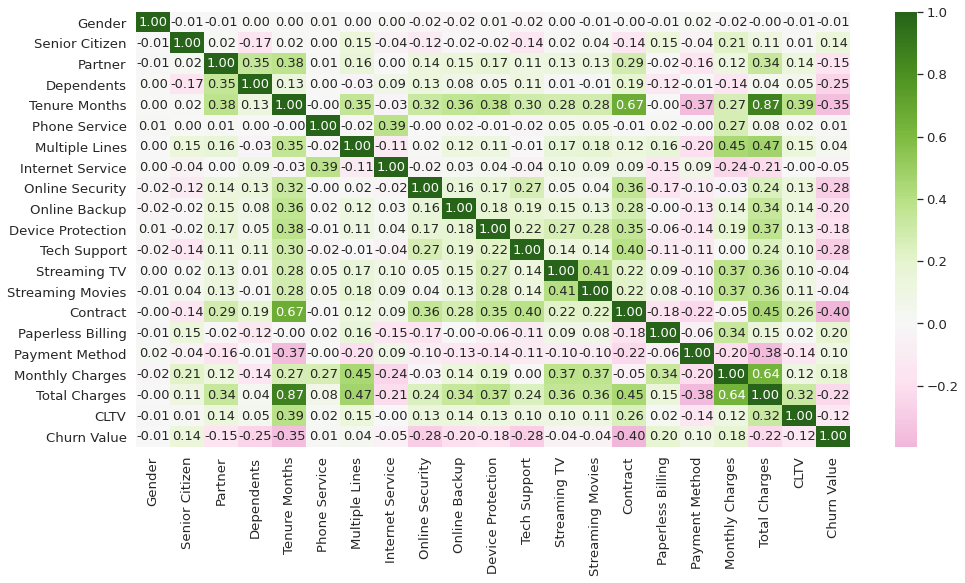

In [14]:
#create a heatmap to demonstrate the correlation magnitude among the variables
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, annot=True, annot_kws={'fontsize':13},
            fmt=".2f", cmap='PiYG', center=0)

In [15]:
telecom_customer = pd.get_dummies(telecom_customer)
telecom_customer

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Value,City_Acampo,City_Acton,City_Adelanto,City_Adin,City_Agoura Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,City_Albion,City_Alderpoint,City_Alhambra,City_Aliso Viejo,City_Alleghany,City_Alpaugh,City_Alpine,City_Alta,City_Altadena,...,City_Witter Springs,City_Wofford Heights,City_Woodacre,City_Woodbridge,City_Woodlake,City_Woodland,City_Woodland Hills,City_Woody,City_Wrightwood,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yosemite National Park,City_Yountville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley,City_Zenia,Churn Reason_Attitude of service provider,Churn Reason_Attitude of support person,Churn Reason_Competitor had better devices,Churn Reason_Competitor made better offer,Churn Reason_Competitor offered higher download speeds,Churn Reason_Competitor offered more data,Churn Reason_Deceased,Churn Reason_Don't know,Churn Reason_Extra data charges,Churn Reason_Lack of affordable download/upload speed,Churn Reason_Lack of self-service on Website,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_None,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction
0,1,0,1,1,67,1,0,0,2,2,0,2,0,0,1,0,3,478,3319,2647,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,53,1,2,1,2,2,2,0,0,0,0,0,2,995,3646,1984,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,48,1,2,0,2,0,2,0,2,2,1,1,1,772,3209,139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,631,218,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,1,1,57,1,2,1,0,0,0,0,0,0,0,1,2,700,3331,1174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,0,0,0,0,15,1,0,2,1,1,1,1,1,1,1,0,1,30,821,1333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4714,0,0,1,1,71,1,2,1,2,2,2,0,2,0,2,1,1,1135,4224,1306,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4715,1,0,1,0,3,0,1,0,0,0,0,0,0,2,0,1,2,171,378,531,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4716,0,0,1,0,17,1,0,1,0,0,2,2,2,2,1,0,0,1128,2336,1922,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [16]:
X = telecom_customer.drop('Churn Value',axis=1)
y=telecom_customer['Churn Value']

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best=SelectKBest(score_func=chi2, k=20)
fit=best.fit(X,y)

In [18]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [19]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(20,'Score'))

                                                Feature          Score
18                                        Total Charges  189048.794303
17                                      Monthly Charges   47465.701631
19                                                 CLTV   30707.802009
4                                         Tenure Months   10609.689454
1152                                  Churn Reason_None    1227.870287
14                                             Contract     739.585164
1138            Churn Reason_Attitude of support person     345.895949
11                                         Tech Support     343.778501
8                                       Online Security     336.978659
1141  Churn Reason_Competitor offered higher downloa...     308.533163
1142          Churn Reason_Competitor offered more data     299.594917
1144                            Churn Reason_Don't know     268.554813
1140          Churn Reason_Competitor made better offer     253.194696
1137  

In [20]:
columns=scores.nlargest(20,'Score')

In [21]:
columns

,Feature,Score
18,Total Charges,189048.794303
17,Monthly Charges,47465.701631
19,CLTV,30707.802009
4,Tenure Months,10609.689454
1152,Churn Reason_None,1227.870287
14,Contract,739.585164
1138,Churn Reason_Attitude of support person,345.895949
11,Tech Support,343.778501
8,Online Security,336.978659
1141,Churn Reason_Competitor offered higher downloa...,308.533163


In [22]:
lists=[]
for x in columns['Feature']:
  lists.append(x)

In [23]:
lists

['Total Charges',
 'Monthly Charges',
 'CLTV',
 'Tenure Months',
 'Churn Reason_None',
 'Contract',
 'Churn Reason_Attitude of support person',
 'Tech Support',
 'Online Security',
 'Churn Reason_Competitor offered higher download speeds',
 'Churn Reason_Competitor offered more data',
 "Churn Reason_Don't know",
 'Churn Reason_Competitor made better offer',
 'Churn Reason_Attitude of service provider',
 'Dependents',
 'Churn Reason_Competitor had better devices',
 'Churn Reason_Price too high',
 'Churn Reason_Product dissatisfaction',
 'Churn Reason_Network reliability',
 'Churn Reason_Service dissatisfaction']

In [24]:
telecom_customer=telecom_customer[lists]
telecom_customer

,Total Charges,Monthly Charges,CLTV,Tenure Months,Churn Reason_None,Contract,Churn Reason_Attitude of support person,Tech Support,Online Security,Churn Reason_Competitor offered higher download speeds,Churn Reason_Competitor offered more data,Churn Reason_Don't know,Churn Reason_Competitor made better offer,Churn Reason_Attitude of service provider,Dependents,Churn Reason_Competitor had better devices,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Network reliability,Churn Reason_Service dissatisfaction
0,3319,478,2647,67,1,1,0,2,2,0,0,0,0,0,1,0,0,0,0,0
1,3646,995,1984,53,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
2,3209,772,139,48,1,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0
3,218,631,241,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3331,700,1174,57,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,821,30,1333,15,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4714,4224,1135,1306,71,1,2,0,0,2,0,0,0,0,0,1,0,0,0,0,0
4715,378,171,531,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4716,2336,1128,1922,17,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=telecom_customer

vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,VIF,Features
0,51.853030,Total Charges
1,11.653689,Monthly Charges
2,4.826096,CLTV
3,31.040640,Tenure Months
4,5.322710,Churn Reason_None
5,3.905990,Contract
6,1.114972,Churn Reason_Attitude of support person
7,2.348748,Tech Support
8,2.249701,Online Security
9,1.120596,Churn Reason_Competitor offered higher downloa...


In [26]:
X=telecom_customer

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [28]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=3)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

In [30]:
from sklearn.linear_model import LogisticRegression

m1 = 'LogisticRegression'
lr = LogisticRegression()
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confusion matrix
[[689   2]
 [  2 245]]


Accuracy of Logistic Regression: 99.57356076759062 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       691
           1       0.99      0.99      0.99       247

    accuracy                           1.00       938
   macro avg       0.99      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938



In [31]:
from sklearn.svm import SVC
m6 = 'Support Vector Classifier'
svc = SVC(kernel = 'rbf')
svc.fit(train_x,train_y)
svc_predicted = svc.predict(test_x)
svc_conf_matrix = confusion_matrix(test_y, svc_predicted)
svc_acc_score = accuracy_score(test_y, svc_predicted)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(test_y,svc_predicted))

# kernels = ['linear', 'poly', 'rbf', 'sigmoid']

confusion matrix
[[689   2]
 [  2 245]]


Support Vector Classifier: 99.57356076759062 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       691
           1       0.99      0.99      0.99       247

    accuracy                           1.00       938
   macro avg       0.99      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938



In [32]:
from sklearn.tree import DecisionTreeClassifier
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier()
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_acc_score = accuracy_score(test_y, dt_predicted)
print("confusion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y,dt_predicted))

confusion matrix
[[686   5]
 [  5 242]]


Accuracy of DecisionTreeClassifier: 98.93390191897655 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       691
           1       0.98      0.98      0.98       247

    accuracy                           0.99       938
   macro avg       0.99      0.99      0.99       938
weighted avg       0.99      0.99      0.99       938



In [33]:
from sklearn.ensemble import RandomForestClassifier
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier()
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confusion matrix
[[688   3]
 [  2 245]]


Accuracy of Random Forest: 99.46695095948827 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       691
           1       0.99      0.99      0.99       247

    accuracy                           0.99       938
   macro avg       0.99      0.99      0.99       938
weighted avg       0.99      0.99      0.99       938



In [34]:

from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=7)
classifier.fit(train_x,train_y)
y_pred4=classifier.predict(test_x)

from sklearn.metrics import confusion_matrix,accuracy_score
print("K Nearest Neighbor Classifier\n")
cm=confusion_matrix(test_y,y_pred4)
print("Confusion Matrix:\n\n",cm)
acc=accuracy_score(test_y,y_pred4)
print("\nAccuracy=",acc)                                                                                                                                                   

K Nearest Neighbor Classifier

Confusion Matrix:

 [[689   2]
 [  3 244]]

Accuracy= 0.9946695095948828
